This serves as a demonstration of the work we have been able to complete so far, with particular focus on cubic splines and our methods for data analysis

In [1]:
## Data tool kit we developed
include("../../datatools.jl")
using CSV, DataFrames, Statistics, LinearAlgebra, Plots, Polynomials

Each road that we are sampling is contained within its own directory. If the road has opposing sidewalks, these have been further subdivided into West and East to denote where the data was collected.

Demonstrated below is the core data structure for our analysis, a vector of DataFrames with each element representing a unique sample from a given road. Methods are also in place to combine the vector into a single dataframe, from which they will be delimited using an additional "Sample" column 

---

Function doc strings $\Downarrow$

In [2]:
## Function doc string 
display("text/markdown",Base.doc(get_folder_dataframes))

```
get_folder_dataframes(foldername::String)
```

takes in the name of a folder or the path to a subfolder in /data/ . returns a vector of all the dataframes in that folder

```julia
sweetwater_dataframes = get_folder_dataframes("Sweetwater")
```


---

In [3]:
sweetwater_dataframes = get_folder_dataframes("Sweetwater")

2-element Vector{Any}:
 790×11 DataFrame
 Row │ time                 seconds_elapsed  bearingAccuracy  speedAccuracy  v ⋯
     │ Int64                Float64          Float64          Float64        F ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1712266854188000000          0.755            45.0          1.5         ⋯
   2 │ 1712266855367640000          1.93464          49.5444       0.778974
   3 │ 1712266856366407200          2.93341          69.841        1.44903
   4 │ 1712266857366600000          3.9336           73.7154       1.35204
   5 │ 1712266858367190800          4.93419          11.7684       0.700928    ⋯
   6 │ 1712266859366409700          5.93341          52.3302       1.18339
   7 │ 1712266860366214400          6.93321          45.0          1.5
   8 │ 1712266860698761000          7.26576          45.0          1.5
  ⋮  │          ⋮                  ⋮                ⋮               ⋮          ⋱
 784 │ 1712267136367092200    

Our intention is to gather a bunch of samples for each road, and then average the samples together. Our method of data collection uses a sensor that records 'x' number of points every second. Since multiple individuals are collecting data on different days and at different times, and are presumably traveling at different speeds, it is unlikely that each sample will contain points from the exact same locations. This is further exacerbated by the sensor recording values down to 15 decimal places, making it unlikely to get a recording from the same position in more than one sample. To account for this, we have developed a function which evaluates the dataframes at a column of interest (which can be specified), and rounds the values to a specified number of digits. It then finds common points of intersection between samples, averages them, and returns the resulting dataframe, now pruned to only contain the necessary columns (latitude, longitude, and altitude).

---

Function doc strings $\Downarrow$

In [4]:
display("text/markdown",Base.doc(get_filtered_points))

```
get_filtered_points(dfs::Vector{Any}, column_name::String="latitude"; round_to::Int=5, only_unique::Bool=true)
```

Takes in vector of dataframes generated by get*folder*dataframes. User specifies a column_name  by which to compare the dataframes. Values are rounded to 5 by default, but can be changed.  The dataframes are trimmed based on these matching rounded values, and only the columns  latitude, longitude, and altitude are returned. These are all that are needed for displaying the points 

```julia
filtered_points = get_filtered_points(folder_dataframes, "latitude"; round_to=3)
```


In [5]:
display("text/markdown",Base.doc(combine_df_vectors))

```
combine_df_vectors(dfs::Vector{Any}; already_filtered::Bool=true, round_to::Int=5)
```

This function takes in a vector of dataframes from the same road (similar samples). It will compare the vectors and average them together. Unique sample latitudes will instead  be appended into the new dataframe. The function assumes that you are passing in the returned value of  get*filtered*points, but allows for you to set already_filtered=false if the data is unfiltered

```julia
sweetwater_dfs = get_folder_dataframes("Sweetwater");

filtered_sw_points = get_filtered_points(sweetwater_dfs);

sw_points = combine_df_vectors(filtered_sw_points)

## alternatively
sw_points = combine_df_vectors(sweetwater_dfs; already_filtered=false)
```


---

In [6]:
sweetwater_filtered_points = get_filtered_points(sweetwater_dataframes)

2-element Vector{Any}:
 296×3 DataFrame
 Row │ latitude  longitude  altitude 
     │ Float64   Float64    Float64  
─────┼───────────────────────────────
   1 │  29.6418   -82.3482  -3.4
   2 │  29.6418   -82.3482  -1.2
   3 │  29.6418   -82.3482  -2.2
   4 │  29.6418   -82.3482  -2.2
   5 │  29.6418   -82.3482  -2.2
   6 │  29.6418   -82.3482  -2.2
   7 │  29.6419   -82.3482  -2.2
   8 │  29.6419   -82.3482  -2.2
  ⋮  │    ⋮          ⋮         ⋮
 290 │  29.6447   -82.3487   8.0551
 291 │  29.6447   -82.3487   8.0551
 292 │  29.6447   -82.3487   8.08144
 293 │  29.6447   -82.3487   7.98812
 294 │  29.6447   -82.3487   7.85234
 295 │  29.6447   -82.3487   7.6329
 296 │  29.6447   -82.3487   7.59701
                     281 rows omitted
 296×3 DataFrame
 Row │ latitude  longitude  altitude 
     │ Float64   Float64    Float64  
─────┼───────────────────────────────
   1 │  29.6418   -82.3482      -2.2
   2 │  29.6418   -82.3482      -2.2
   3 │  29.6418   -82.3482      -2.2
   4 │  29.64

In [7]:
# Averaged sample

sweetwater_averaged_df = combine_df_vectors(sweetwater_filtered_points)


Row,latitude,longitude,altitude
,Float64,Float64,Float64
1,29.6418,-82.3482,-2.8
2,29.6418,-82.3482,-1.7
3,29.6418,-82.3482,-2.2
4,29.6418,-82.3482,-2.2
5,29.6418,-82.3482,-2.8
6,29.6418,-82.3482,-2.8
7,29.6419,-82.3482,-2.8
8,29.6419,-82.3482,-2.8
9,29.6419,-82.3482,-2.8


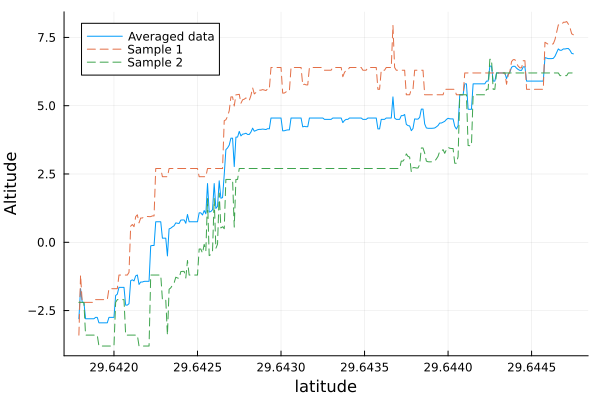

In [8]:
x₁ = sweetwater_filtered_points[1].latitude;
y₁ = sweetwater_filtered_points[1].altitude;

x₂ = sweetwater_filtered_points[2].latitude;
y₂ = sweetwater_filtered_points[2].altitude;

x̄ = sweetwater_averaged_df.latitude;
ȳ = sweetwater_averaged_df.altitude;


plt = plot(x̄, ȳ, label="Averaged data", ylabel="Altitude", xlabel="latitude")
plot!(plt, x₁, y₁, label="Sample 1", ls=:dash)
plot!(plt, x₂, y₂, label="Sample 2", ls=:dash)


---

Demonstration of our current work on cubic splines:

In [9]:
function spinterp(t,y)
     n = length(t)-1
     h = [ t[k+1]-t[k] for k in 1:n ]
 
     # Preliminary definitions.
     Z = zeros(n,n);
     In = I(n);  E = In[1:n-1,:];
     J = diagm(0=>ones(n),1=>-ones(n-1))
     H = diagm(0=>h)
 
     # Left endpoint interpolation:
     AL = [ In Z Z Z ]
     vL = y[1:n]
 
     # Right endpoint interpolation:
     AR = [ In H H^2 H^3 ];
     vR = y[2:n+1]
 
     # Continuity of first derivative:
     A1 = E*[ Z J 2*H 3*H^2 ]
     v1 = zeros(n-1)
 
     # Continuity of second derivative:
     A2 = E*[ Z Z J 3*H ]
     v2 = zeros(n-1)
 
     # Not-a-knot conditions:
     nakL = [ zeros(1,3*n) [1 -1 zeros(1,n-2)] ]
     nakR = [ zeros(1,3*n) [zeros(1,n-2) 1 -1] ]
 
     # Assemble and solve the full system.
     A = [ AL; AR; A1; A2; nakL; nakR ]
     v = [ vL; vR; v1; v2; 0; 0 ]
     z = A\v
 
     # Break the coefficients into separate vectors.
     rows = 1:n
     a = z[rows]
     b = z[n.+rows];  c = z[2*n.+rows];  d = z[3*n.+rows]
     S = [ Polynomial([a[k],b[k],c[k],d[k]]) for k in 1:n ]
 
     # This function evaluates the spline when called with a value
     # for x.
     return function (x)
         if x < t[1] || x > t[n+1]    # outside the interval
             return NaN
         elseif x==t[1]
             return y[1]
         else
             k = findlast(x .> t)    # last node to the left of x
             return S[k](x-t[k])
         end
     end
 end

spinterp (generic function with 1 method)

In [10]:
function plot_cubic_spline(plt, x, y, n=10; la=0.6, fa=0.0)
     # x_sorted = sort(x, rev=true);
     xs, ys = get_spaced_nodes(x, y, n);
     cspline_f = spinterp(xs, ys)
     plot!(plt, x, cspline_f.(x), fillrange=y, fillalpha = fa, label="n=$n",ls=:dash, alpha=la)
end

plot_cubic_spline (generic function with 2 methods)

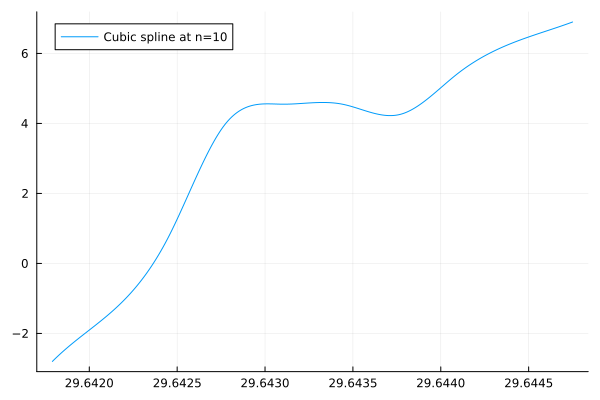

In [11]:
xn, yn = get_spaced_nodes(x̄, ȳ, 10)

cspline_f = spinterp(xn, yn)

plot(x̄, cspline_f.(x̄), label="Cubic spline at n=10")

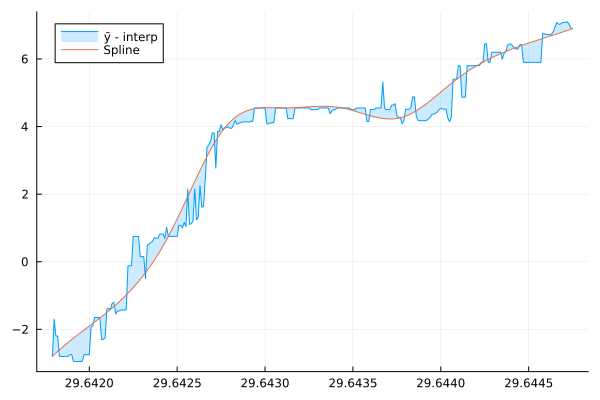

In [12]:
plt = plot(x̄, ȳ, fillrange=cspline_f.(x̄), fillalpha=0.2, label="ȳ - interp")
plot!(x̄, cspline_f.(x̄), label="Spline")

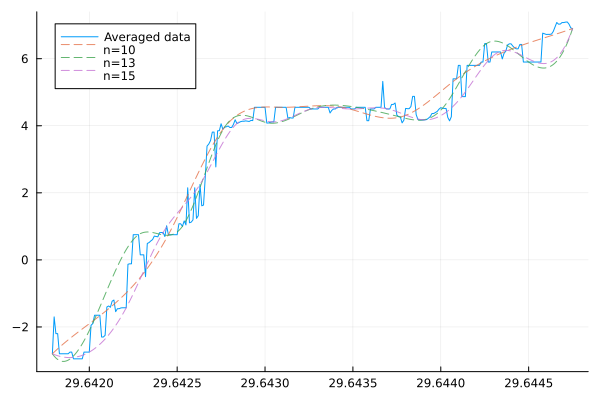

In [14]:
plt = plot(x̄, ȳ, label="Averaged data");

for n=[10,13,15]
     plot_cubic_spline(plt, x̄, ȳ, n; la=0.8)
end
plt

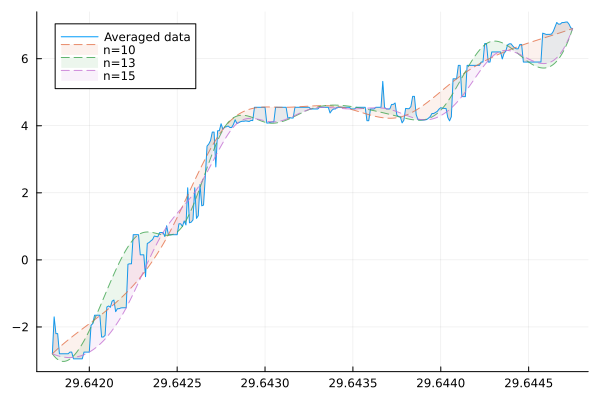

In [15]:
plt = plot(x̄, ȳ, label="Averaged data");

for n=[10,13,15]
     plot_cubic_spline(plt, x̄, ȳ, n; la=0.8, fa=0.1)
end
plt

Choosing our $n$ values carefully is critical to avoid overfitting, we increasing this value just a bit shows such

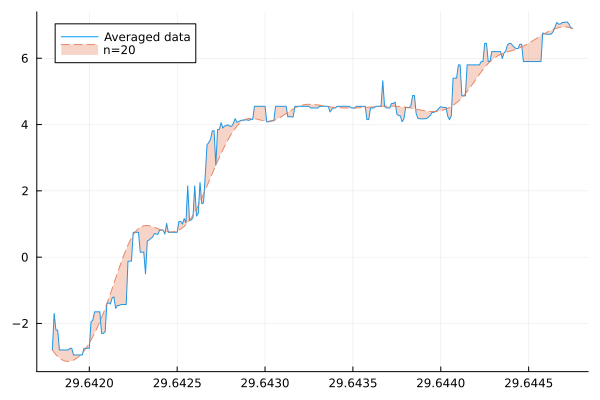

In [16]:
plt = plot(x̄, ȳ, label="Averaged data");
plot_cubic_spline(plt, x̄, ȳ, 20; la=0.8, fa=0.3)


Taking this further

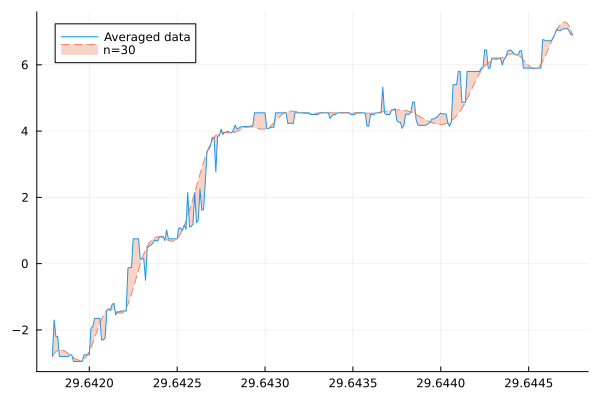

In [17]:
plt = plot(x̄, ȳ, label="Averaged data");
plot_cubic_spline(plt, x̄, ȳ, 30; la=0.8, fa=0.3)


Oncemore

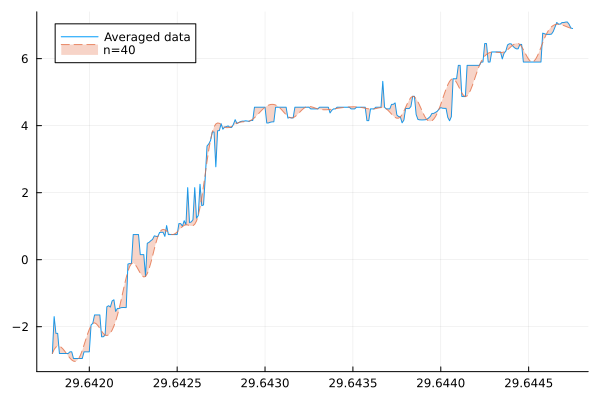

In [18]:
plt = plot(x̄, ȳ, label="Averaged data");
plot_cubic_spline(plt, x̄, ȳ, 40; la=0.8, fa=0.3)


We have opted for $n$ values in the range $[10, 15]$. In our testing we have found that these provide adhesion and smoothness to the data without overly matching the original values

We believe that this careful selection of $n$ values and averaging our samples will aid in producing smooth, accurate results that are not overfit. Moreover, our function `get_spaced_nodes` will grab $n$ number of values from the dataset that are equidistant, thus forming a box-spline. We have added in the parameter `fluctuation`, that will shift indices by a random value in the range $\pm$ fluctuation. This excludes the first and last index to ensure that the splines are being fit to the entire breadth of the sample. This may provide additional information on the nature of the data

In [19]:
display("text/markdown",Base.doc(get_spaced_nodes))

```
get_spaced_nodes(x, y, n=10; rev=true, fluctuation::Int=0)
```

Takes in x and y values. returns 'n' number of spaced out points from the data. By default this will return evenly spaced points, but setting fluctuation=SOME_INT will  cause each index to change by ± a value in the range [-fluctuation , fluctuation] 


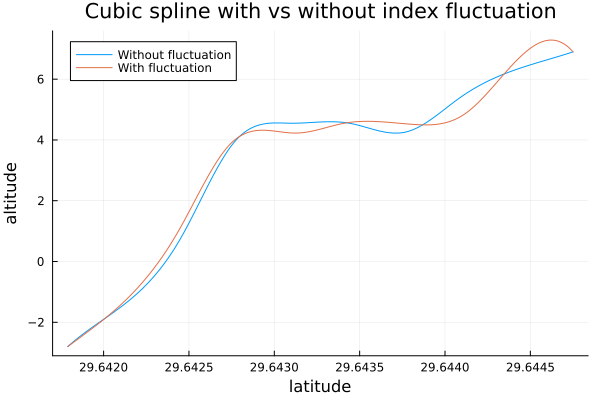

In [26]:
xn2, yn2 = get_spaced_nodes(x̄, ȳ, 10; fluctuation=5);

cspline_f2 = spinterp(xn2, yn2);

plot(x̄, cspline_f.(x̄), label="Without fluctuation", title="Cubic spline with vs without index fluctuation")
plot!(x̄, cspline_f2.(x̄), label="With fluctuation", ylabel="altitude", xlabel="latitude")